In [1574]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pydataset import data
import env

pd.options.display.max_columns = None


For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?
- Is the website redesign any good?
- Is our television ad driving more sales?

#### Has the network latency gone up since we switched internet service providers?
$H_{0}$ :  Service providers has no effect on network latency

$H_{a}$ : Service providers has effect on network latency

True Positive: we rejected Null Hypothesis, new service provider's clogged network on busy hours. 

True Negative: We failed to reject Null Hypothesis, playing 4k games increases network latency

type I: We rejected Null Hypothesis, slow computer causes increase on network latency

type II: We failed to reject Null Hypothesis, service provider's internet speed is slower than other service provider's internet speed.

#### Is the website redesign any good?
$H_{0}$ : website redesign is not good

$H_{a}$ : website redesign is good

True Positive: we rejected Null Hypothesis, website redsegin voted best by consumers

True Negative: we failed to reject Null Hypothesis, website redsegin voted worst by consumers

Type I: we rejected Null Hypothesis, number users visitng website decreases because of bad redesign

Type II: we failed to reject Null Hypothesis, high number of users said that website redesign is good

#### Is our television ad driving more sales?
$H_{0}$ : television ad is not increasing sales

$H_{a}$ : television ad increases sales

True Positive: we rejected Null Hypothesis, sales remain same after television ad

True Negative: we failed to reject Null Hypothesis, customers who haven't seen televsions ad increased sales

type I: we rejected  Null Hypothesis, sales decreases after televison ad

type II: we failed to reject Null Hypothesis, sales increases after television ad

#### Answer with the type of test you would use (assume normal distribution):

   - Is there a difference in grades of students on the second floor compared to grades of all students?
    
   - Are adults who drink milk taller than adults who dont drink milk?
     
   - Is the the price of gas higher in texas or in new mexico?    
    
   - Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
   

2-tail One Sample T-Test

1-tail Independent T-Test

1-tail Independent T-Test, greater than

ANOVA Analysis of Variance


####  3. Load the mpg dataset and use it to answer the following questions:

    - Is there a difference in fuel-efficiency in cars from 2008 vs 1999? 
    
    - Are compact cars more fuel-efficient than the average car?
    
    - Do manual cars get better gas mileage than automatic cars?

In [1018]:
df = data('mpg')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [1019]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [1020]:
df['fuel_efficiency'] = (df.cty + df.hwy)/2
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


###  Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [1021]:
# Independent T-Test 2_tail, significantly different

### Hypothesis
$H_{0}$ : cars from 2008 and 1999 has no difference in fuel-efficiency

$H_{a}$ : cars from 2008 and 1999 has difference in fuel- efficiency

### Significane Level
Alpha set to 0.05

In [1022]:
year_1999 = df[df.year == 1999].fuel_efficiency
year_2008 = df[df.year == 2008].fuel_efficiency

In [1023]:
alpha = 0.05

### Verify assumptions

- Independent sample
- Normal Distribution, or at least 30 observations
- Equal Variance

In [1024]:
df.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [1025]:
print(year_1999.var())
print(year_2008.var())

27.122605363984682
24.097480106100797


### Compute test statistic and probability (t-statistic & p-value)

In [1026]:
t, p = stats.ttest_ind(year_1999, year_2008, equal_var=False)
t, p

(0.21960177245940962, 0.8263750772060638)

### Decide:
    
- p-value < alpha

In [1027]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

if p < alpha:
    print('Reject $H_{0}$')
else: 
    print('Fail to reject $H_{0}$ ')



Fail to reject $H_{0}$ 


### Conclusion: 
We failed to reject the Null Hypothesis, there is no significant difference in fuel effficiency between cars made in 1999 and 2008

#### Are compact cars more fuel-efficient than the average car?

In [1028]:
# One Sample T-Test 1-tail, significantly larger

### Hypothesis
$H_{0}$ :compact cars are not fuel-effiecient than average car

$H_{a}$ : compact cars are more fuel-effiecient than of all car

### Significane Level
Alpha set to 0.05

In [1029]:
alpha = 0.05

### Verify Assumptions

- Normal Distribution, or at least 30 observations 

In [1030]:
df['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [1031]:
compact_sample = df[df['class'] == 'compact'].fuel_efficiency
overall_mean = df.fuel_efficiency.mean()
overall_mean

20.14957264957265

### Compute test statistic and probability (t-statistic & p-value)

In [1032]:
t, p = stats.ttest_1samp(compact_sample, overall_mean)
t, p/2

(7.896888573132533, 2.0992818971585743e-10)

### Decide

- p/2 < alpha and t > 0


In [1033]:
# Are compact cars more fuel-efficient than the average car?

if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")


We reject $H_{0}$


### Conclusion: 
We rejected the Null Hypothesis, compact cars are more efficient than the average car

###  Do manual cars get better gas mileage than automatic cars?

In [1034]:
# Independent T-Test 1 tail, significantly larger

### Hypothesis

$𝐻_{0}$  : manual cars are not more fuel-efficient than automatic cars

$𝐻_{𝑎}$  : manual cars are more fuel-efficient than automatic cars

###  Significane Level

Alpha set to 0.05

In [1035]:
alpha = 0.05

In [1036]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [1037]:
manual_sample = df[df.trans.str.startswith('m')].fuel_efficiency
auto_sample =df[df.trans.str.startswith('a')].fuel_efficiency 


In [1038]:
manual_sample.mean()

22.227272727272727

In [1039]:
auto_sample.mean()

19.130573248407643

### Verify assumptions

- Independent sample
- Normal Distribution, or at least 30 observations
- Equal Variance

In [1040]:
df.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [1041]:
manual_sample.var()

26.635167464114826

In [1042]:
auto_sample.var()

21.942777233382337

In [1043]:
# check variance 

t, p = stats.levene(manual_sample, auto_sample)
t, p/2

(0.20075824847529639, 0.32726381775659286)

### Compute test statistic and probability (t-statistic & p-value)

In [1044]:
t, p = stats.ttest_ind(manual_sample, auto_sample, equal_var=False)
t, p / 2


(4.443514012903072, 8.976124499958947e-06)

### Decide

- p/2 < alpha and t > 0

In [1045]:
#Do manual cars get better gas mileage than automatic cars?

if p / 2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

    
# another way

# if t > 0 and (p/2) < alpha:
#     print("We reject $H_{0}$")
# else:
#     print("We fail to reject $H_{0}$")
    


We reject $H_{0}$


### Conclusion:
We rejected the Null Hypothesis, manual cars are more fuel-efficient than automatic car

------------

#### 1. Answer with the type of stats test you would use (assume normal distribution):

- Is there a relationship between the length of your arm and the length of your foot?

  Pearson's R and Spearmans
  
    
- Do guys and gals quit their jobs at the same rate?

    T-Test, independent, 2 tailed
    
    
- Does the length of time of the lecture correlate with a students grade?

    perason's R

In [1046]:
from pydataset import data
import env

#### 2. Use the telco_churn data.
- Does tenure correlate with monthly charges?
- Total charges?
- What happens if you control for phone and internet service?

In [1341]:
url = f'mysql+pymysql://{username}:{password}@{host}/telco_churn'
df = pd.read_sql('SELECT * FROM customers', url)

In [1342]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,Yes,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,No,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,No,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,Yes,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,No,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [1344]:
# check for data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

### Hypothesis

$H_0$ - There is no linear relationship between tenure and monthly charges

$H_a$ - There is linear relationship between tenure and monthly charges

In [1255]:
# set alpha

alpha = 0.05

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

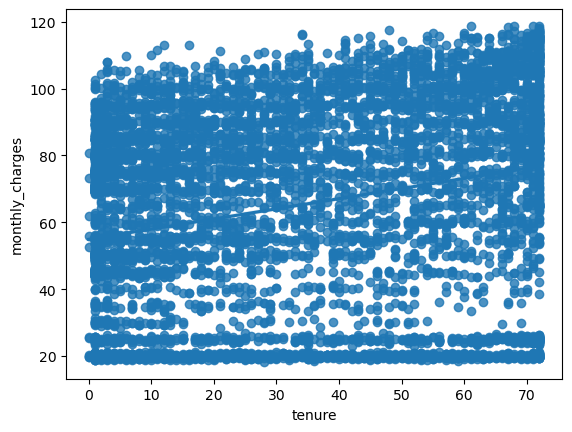

In [1345]:
# select data

charges_df = df[['tenure', 'monthly_charges']]

# plot data

sns.regplot(x='tenure', y='monthly_charges', data=charges_df)

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

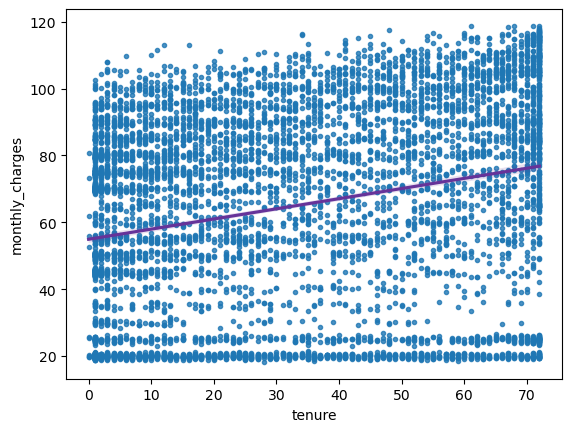

In [1346]:
# better version 

sns.regplot(x='tenure', y='monthly_charges', data=charges_df, marker='.', line_kws={'color':'rebeccapurple'})

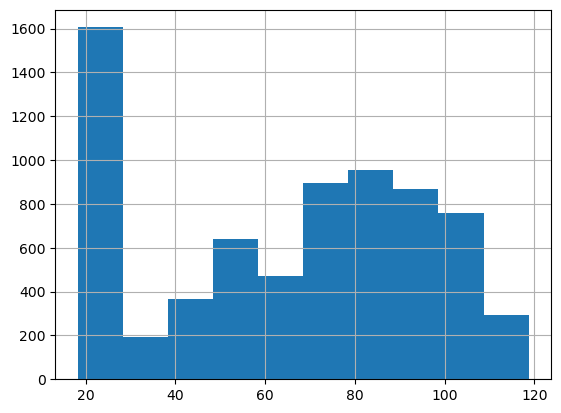

<AxesSubplot:>

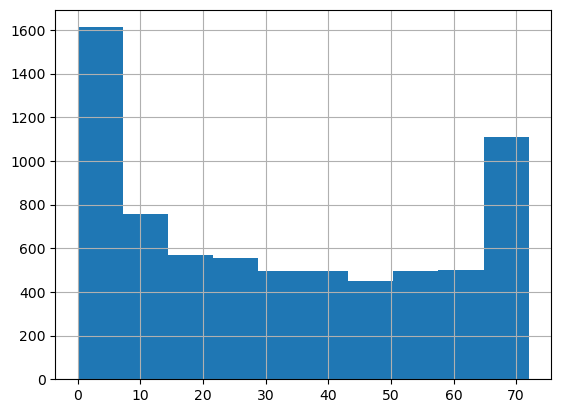

In [1347]:
# distributions of the data to check for normalcy

charges_df.monthly_charges.hist()
plt.show()
charges_df.tenure.hist()

These distributions are not normal, so we use a Speramans test

In [1348]:
# find r and p-value

r, p = stats.spearmanr(df.tenure, df.monthly_charges)
r, p

(0.27641678933130215, 1.0271266876409408e-123)

In [1349]:
# compare p-value

def eval_result(alpha, p):
    if p < alpha: 
       return (f'We rejected Null Hypothesis. There is a linear corelation. (p-value): {p}')
    else:
        return (f'We Fail to reject Null Hypothesis. There is no linear corelation. (p-value): {p}')
    

eval_result(alpha,p)

'We rejected Null Hypothesis. There is a linear corelation. (p-value): 1.0271266876409408e-123'

### Conclusion:
We rejected the Null Hypothesis, there is a linear relationship between tenure and monthly charges

--------
#### Tenure with total_charges?

### Hypothesis¶
𝐻0  - there is no linear relationship between tenure and total charges

𝐻𝑎  - there is linear relationship between tenure and total charges


In [1350]:
total_charges_df = df[['tenure', 'total_charges']]

In [1351]:
# check data 

total_charges_df

,tenure,total_charges
0,9,593.3
1,9,542.4
2,4,280.85
3,13,1237.85
4,3,267.4
...,...,...
7038,13,742.9
7039,22,1873.7
7040,2,92.75
7041,67,4627.65


In [1352]:
total_charges_df.total_charges.dtypes


dtype('O')

In [1353]:
# in order to convert dtype object to float, need to replace total_charges that have empty space

# replace string(' ') with string with('0')

total_charges_df['total_charges'] = total_charges_df['total_charges'].str.replace(' ', '0')

/var/folders/zx/rl1648955j94d0gt7b_0rshh0000gn/T/ipykernel_7291/41546047.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_charges_df['total_charges'] = total_charges_df['total_charges'].str.replace(' ', '0')


In [1354]:
# convert dtype object to float

total_charges_df['total_charges'] = total_charges_df['total_charges'].astype(float)

/var/folders/zx/rl1648955j94d0gt7b_0rshh0000gn/T/ipykernel_7291/1036179661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_charges_df['total_charges'] = total_charges_df['total_charges'].astype(float)


In [ ]:
#  replace and convert in one step 

# total_charges_df['total_charges'] = total_charges_df['total_charges'].str.replace(' ', '0').astype(float)

In [1355]:
total_charges_df['total_charges'].dtypes

dtype('float64')

<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

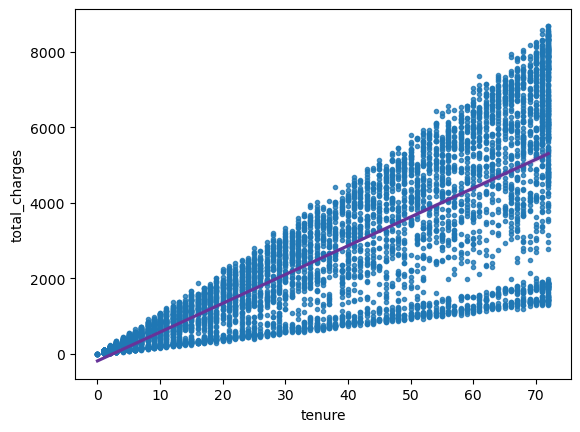

In [1356]:
# plot 

sns.regplot ( x='tenure', y='total_charges',
             data=total_charges_df, 
             marker='.',
             line_kws={'color': 'rebeccapurple'})

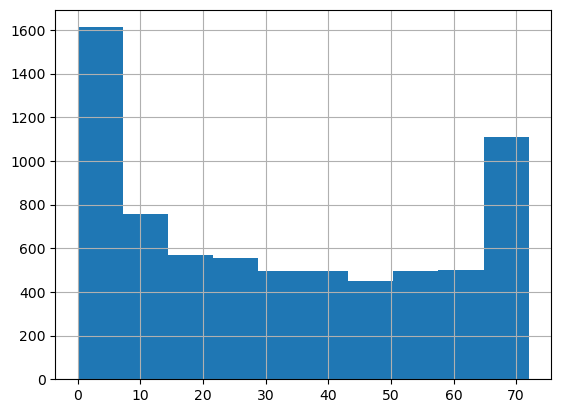

<AxesSubplot:>

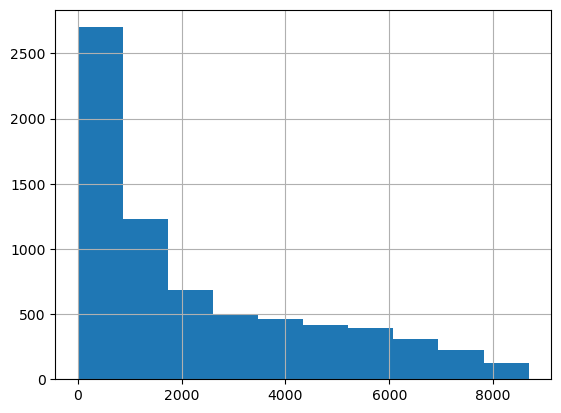

In [1266]:
# check for normalcy

total_charges_df.tenure.hist()
plt.show()
total_charges_df.total_charges.hist()

These distributions are not normal, so use Spearmans test

In [1267]:
# find r and p-value

alpha = 0.05
r, p = stats.spearmanr(total_charges_df.total_charges, total_charges_df.tenure)
r, p


(0.8896957900597576, 0.0)

In [1357]:
# compare p-value calling function

eval_result(alpha,  p)

'We rejected Null Hypothesis. There is a linear corelation. (p-value): 1.0271266876409408e-123'

### Conclusion: 
There is a linear corelation between tenure and totalcharges. with an r of .89, the corelation is strong

In [1054]:
# find index causing ValueError: could not convert string to float: ''

# for i, item in enumerate(df1.total_charges):
#     try:
#         float(item)
#     except ValueError:
        print(f"Error at {i}: {item}")

Error at 945:  
Error at 1731:  
Error at 1906:  
Error at 2025:  
Error at 2176:  
Error at 2250:  
Error at 2855:  
Error at 3052:  
Error at 3118:  
Error at 4054:  
Error at 5433:  


-----

In [1055]:
# find valus causing ValueError: could not convert string to float: ''

# df.total_charges[945]

' '

In [1056]:
# convert string to Float even those causing errors

# df.total_charges= pd.to_numeric(df.total_charges,errors='coerce')

In [1057]:
# check data types

# df.total_charges.dtypes

dtype('float64')

In [1358]:
# convert NAN to zeros

# df.total_charges = df.total_charges.fillna(0)

In [ ]:
# Check if NAN is converted to zero

# df.total_charges[945]

----

-----------------
####  What happens if you control for phone and internet service?

In [1248]:
# look at customers who have phone service and no internet

#### Customers who have only phone service:
    H_0: There is no linear corelation between tenure and monthly charges
    H_a: There is linear corelation between tenure and monthly charges

In [1270]:
# set alpha
alpha = 0.05

#select the data 
phone_df = df[(df1.phone_service == 'Yes') & (df1.internet_service_type_id == 1)][['tenure', 'monthly_charges']]

In [1272]:
# checking data
phone_df.head()

,tenure,monthly_charges
0,9,65.60
1,9,59.90
5,9,69.40
8,7,48.20
9,65,90.45


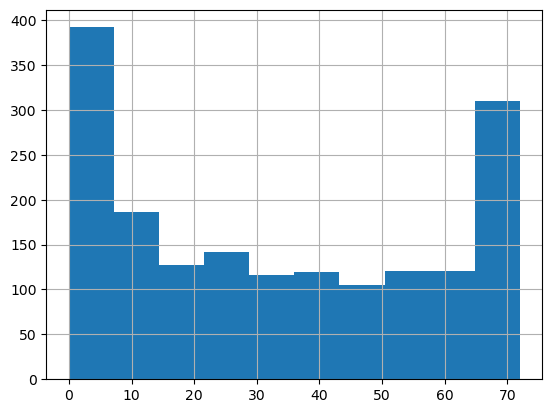

<AxesSubplot:>

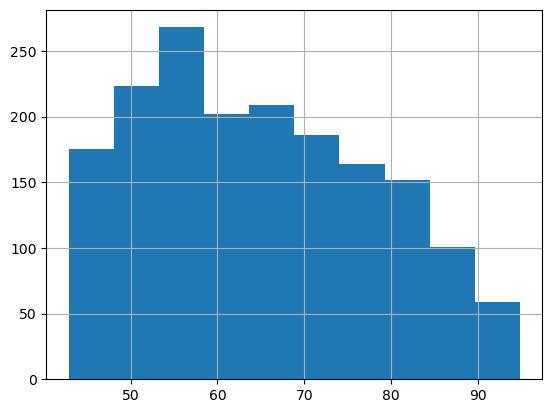

In [1362]:
# check normalcy

phone_df.tenure.hist()
plt.show()
phone_df.monthly_charges.hist()

These distributions are not normal, so use Spearmans test

In [1364]:
# find r and p-value
r, p = stats.spearmanr(phone_df.tenure, phone_df.monthly_charges)

print(r, p)


0.6644708508462759 5.423601644635052e-222


In [1365]:
# compare value 
eval_result(alpha, p)

'We rejected Null Hypothesis. There is a linear corelation. (p-value): 5.423601644635052e-222'

### Conclusion:
Thes is moderate-strong relationship between tenure and monthly charges for customers who have only phone service 


#### 3. Use the employees database.
- Is there a relationship between how long an employee has been with the company and their salary?
- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [ ]:
querry_salary_title = """
    SELECT emp_no, s.salary, s.from_date, s.to_date, t.title
    FROM salaries s
    JOIN titles t USING(emp_no);
    """

In [1137]:
url = f'mysql+pymysql://{username}:{password}@{host}/employees'
df = pd.read_sql(querry_salary_title, url)


In [1153]:
# check if data is migrated correctly
df.head()

,emp_no,salary,from_date,to_date,title,Salary_to_date
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1987-06-26
1,10001,62102,1987-06-26,1988-06-25,Senior Engineer,1988-06-25
2,10001,66074,1988-06-25,1989-06-25,Senior Engineer,1989-06-25
3,10001,66596,1989-06-25,1990-06-25,Senior Engineer,1990-06-25
4,10001,66961,1990-06-25,1991-06-25,Senior Engineer,1991-06-25


In [1366]:
# check dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [1368]:
#check size 
df.shape

(7043, 21)

In [1149]:
# getting today's date
import datetime

today_date = datetime.date.today()
today_date

today_date.year, today_date.month,today_date.day

# df.to_date.astype(str).str.replace('date.today', today_date)


(2022, 12, 5)

In [1156]:
df['Salary_to_date'] = df.to_date

In [1157]:
df['duration'] = df['to_date']- df['from_date']


In [1158]:
df.head()

,emp_no,salary,from_date,to_date,title,Salary_to_date,duration
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1987-06-26,"365 days, 0:00:00"
1,10001,62102,1987-06-26,1988-06-25,Senior Engineer,1988-06-25,"365 days, 0:00:00"
2,10001,66074,1988-06-25,1989-06-25,Senior Engineer,1989-06-25,"365 days, 0:00:00"
3,10001,66596,1989-06-25,1990-06-25,Senior Engineer,1990-06-25,"365 days, 0:00:00"
4,10001,66961,1990-06-25,1991-06-25,Senior Engineer,1991-06-25,"365 days, 0:00:00"


----------
#### Solution: 

In [1370]:


querry = """
SELECT * 
FROM employees
JOIN salaries USING(emp_no)
WHERE to_date = '9999-01-01';
"""

In [1371]:
url = f'mysql+pymysql://{username}:{password}@{host}/employees'
df = pd.read_sql(querry, url)

#### Steps: 
- state hypothesis, set alpha
- select data, run .info()
- plot the data
- test for asumptions
- run test
- draw conclusion


#### Is there a relationship between an employees tenure and salary

### Hypothesis
H_O : There is no corelation between tenure and salary
    
H_a : There is corelation between tenure and salary

In [1294]:
# set alpha
alpha = 0.05


In [1373]:
# get data for tenure by subtracting hire_date from today's date
df['tenure'] = pd.to_datetime('today')- pd.to_datetime(df.hire_date)

In [1375]:
# check data of tenure 
df.tenure.head()

0   13311 days 14:01:42.393623
1   13528 days 14:01:42.393623
2   13248 days 14:01:42.393623
3   13153 days 14:01:42.393623
4   12137 days 14:01:42.393623
Name: tenure, dtype: timedelta64[ns]

In [1383]:
df.tenure.info()

<class 'pandas.core.series.Series'>
RangeIndex: 240124 entries, 0 to 240123
Series name: tenure
Non-Null Count   Dtype          
--------------   -----          
240124 non-null  timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 1.8 MB


In [1296]:
# expand tenure data
df.tenure.astype('str').str.split(' ', expand=True)

,0,1,2
0,13311,days,11:51:54.307792
1,13528,days,11:51:54.307792
2,13248,days,11:51:54.307792
3,13153,days,11:51:54.307792
4,12137,days,11:51:54.307792
...,...,...,...
240119,10919,days,11:51:54.307792
240120,11757,days,11:51:54.307792
240121,13377,days,11:51:54.307792
240122,10645,days,11:51:54.307792


In [1303]:
#  split, convert data to int
df.tenure = df.tenure.astype('str').str.split(' ', expand=True) [0].astype('int')
df.tenure.head()

0    13311
1    13528
2    13248
3    13153
4    12137
Name: tenure, dtype: int64

In [1305]:
# get data
tenure_df = df[['tenure', 'salary']]

<AxesSubplot:xlabel='tenure', ylabel='salary'>

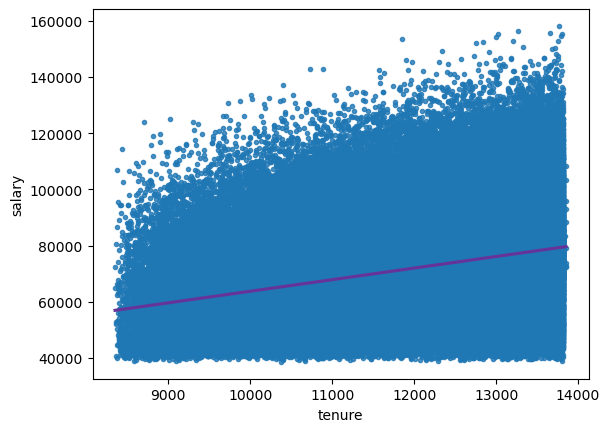

In [1306]:
# plot 
sns.regplot(x='tenure', y='salary',
          data=tenure_df,
          marker='.',
          line_kws= {'color': 'rebeccapurple'})

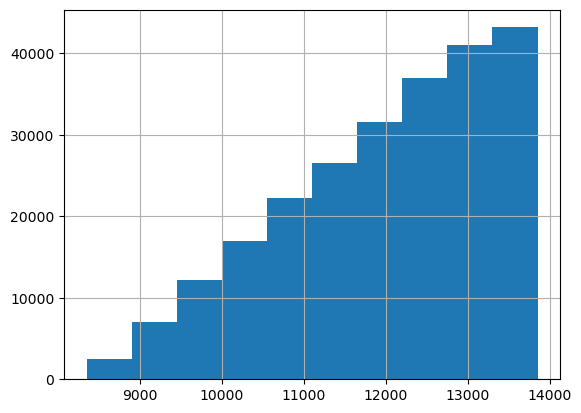

<AxesSubplot:>

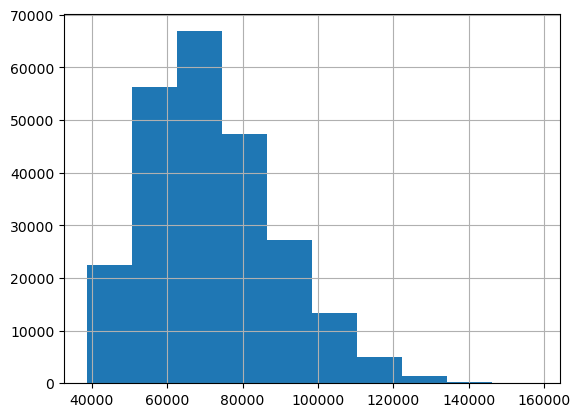

In [1307]:
# check normalcy 
tenure_df.tenure.hist()
plt.show()
tenure_df.salary.hist()

The disributions are not normal, use Spearmans test

In [1310]:
# run test

r, p = stats.spearmanr(tenure_df.tenure, tenure_df.salary)
print(r, p)

eval_result(alpha, p)

0.3128783525010577 0.0


'We rejected Null Hypothesis. There is a linear corelation. (p-value): 0.0'

In [ ]:
### Conclusion:
There is a moderate corelation between tenure and salary

In [ ]:
#### Is there a relationship between employee tenure and the number of tittles they have had?


In [ ]:
aplha = 0.05


-----


SELECT emp_no, count(title) AS num_titles
FROM titles
GROUP BY emp_no

SELECT emp_no, datediff(now(), min(from_date)) AS tenure
FROM titles
GROUP BY emp_no
HAVING max(to_date)= '9999-01-01'



SELECT t.emp_no, count(t.title) AS num_titles, te.tenure
FROM titles t
JOIN (SELECT emp_no, datediff(now(), min(from_date)) AS tenure
    FROM titles
    GROUP BY emp_no
    HAVING max(to_date)= '9999-01-01'
    ) te using (emp_no)
GROUP BY t.emp_no;

In [1316]:
querry = """
    SELECT t.emp_no, count(t.title) AS num_titles, te.tenure
    FROM titles t
    JOIN (SELECT emp_no, datediff(now(), min(from_date)) AS tenure
        FROM titles
        GROUP BY emp_no
        HAVING max(to_date)= '9999-01-01'
        ) te using (emp_no)
    GROUP BY t.emp_no;
    """

In [1317]:
url = f'mysql+pymysql://{username}:{password}@{host}/employees'
df = pd.read_sql(querry, url)

In [1318]:
df.head()

,emp_no,num_titles,tenure
0,10001,1,13311
1,10002,1,9620
2,10003,1,9864
3,10004,2,13153
4,10005,2,12137


In [1321]:
df = df[['num_titles', 'tenure']]

<AxesSubplot:xlabel='tenure', ylabel='num_titles'>

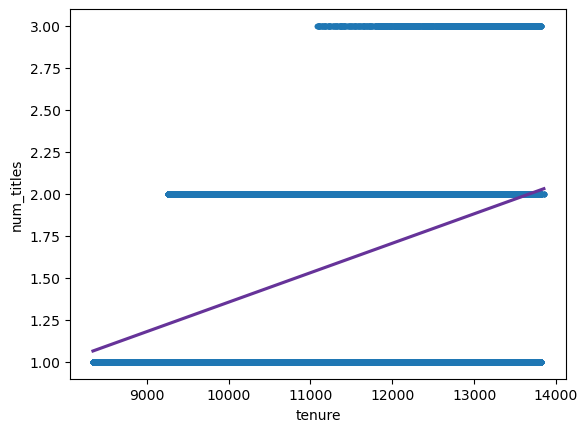

In [1322]:
sns.regplot(x='tenure', y='num_titles',
          data=df,
          marker='.',
          line_kws= {'color': 'rebeccapurple'})

Discrete value, use ANOVA or Kruakl Wallis test to test wheter the average salary of those with 1 title is different 
from 

In [1323]:
stats.levene(df.num_titles, df.tenure)

LeveneResult(statistic=718602.1569097865, pvalue=0.0)

In [1324]:
stats.kruskal(df.num_titles, df.tenure)

KruskalResult(statistic=371488.64419334417, pvalue=0.0)

In [1325]:
eval_result(alpha, p)

'We rejected Null Hypothesis. There is a linear corelation. (p-value): 0.0'

#### 4. Use the sleepstudy data.
    - Is there a relationship between days and reaction time?

#### Hypothesis

H_0: There is a no relationship between days and reaction time

H_a: These is relationhip between days and reaction time

In [1327]:
df = data('sleepstudy')
df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [1328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [1330]:
df = df[['Days', 'Reaction']]

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

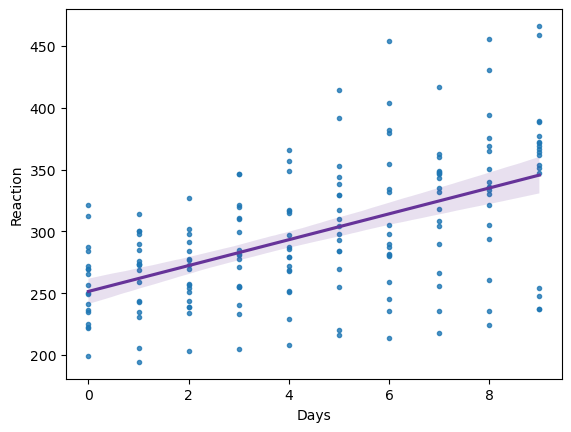

In [1335]:
sns.regplot(x='Days', y='Reaction',
          data=df,
          marker='.',
          line_kws= {'color': 'rebeccapurple'})

<AxesSubplot:>

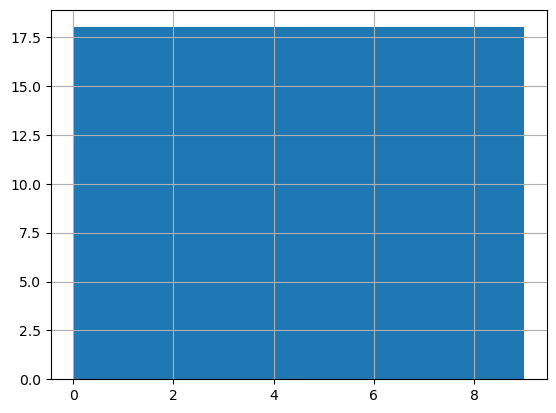

In [1331]:
df.Days.hist()


<AxesSubplot:>

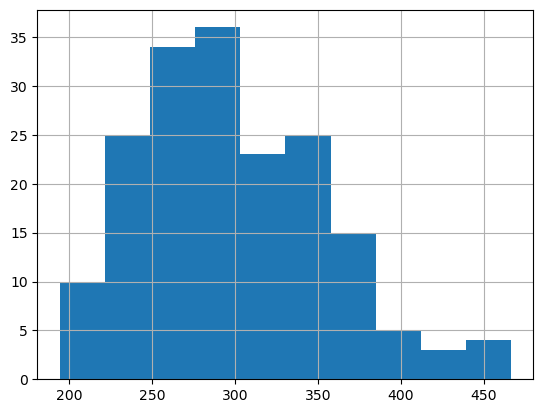

In [1332]:
df.Reaction.hist()

Days is uniformly distributed, and reaction time is normally distributed

In [1333]:
r, p = stats.spearmanr(sleepstudy_df.Reaction, sleepstudy_df.Days)

r, p

(0.5228138502259547, 5.132878057706873e-14)

In [1334]:
eval_result(alpha, p)

'We rejected Null Hypothesis. There is a linear corelation. (p-value): 5.132878057706873e-14'

#### Conclusion:¶
We rejected the Null Hypothesis, there is moderate relationship between days and reaction time

---
### Chi Square Exercises

#### 1. Answer with the type of stats test you would use (assume normal distribution):

- Do students get better test grades if they have a rubber duck on their desk?

    Chi-Square Contingency Test
    
- Does smoking affect when or not someone has lung cancer?

    Chi-Square Contingency Test
    
- Is gender independent of a person’s blood type?

    Chi-Square Contingency Test
    
- A farming company wants to know if a new fertilizer has improved crop yield or not

   T test
   
- Does the length of time of the lecture correlate with a students grade?

    Pearson's R

- Do people with dogs live in apartments more than people with cats?

    T test

#### 2. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

                  Codeup Student	Not Codeup Student
                        
- Uses a Macbook	       49	            20
- Doesn't Use A Macbook	   1	            30

In [1579]:
data_1 = [49,20],[1,30]
# create dataframe with columns name and index name
observed= pd.DataFrame(data_1, index =['Uses_a_Macbook','Doesn\'t_Use_a_Macbook'], columns=['Codeup_Student', 'Not_Codeup_Student'])
observed


,Codeup_Student,Not_Codeup_Student
Uses_a_Macbook,49,20
Doesn't_Use_a_Macbook,1,30


### Hypothesis:

𝐻0 : Macbook user is independent of being a codeupstudent

𝐻𝑎 : Macbook user is dependent of being a codeupstudent

In [1581]:
# set alpha
alpha = 0.05

# run chi2_contingency 
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(36.65264142122487,
 1.4116760526193828e-09,
 1,
 array([[34.5, 34.5],
        [15.5, 15.5]]))

In [1586]:
# compare p-value

if p < alpha:
    print(f'We rejected Null Hypothesis. There is no relationship between Macbook users and codeup students. (p-value: {p})')
else:
    print(f'We fail to reject Null Hypothesis.There is relationship between Macbook users and codeup students.(p-value: {p})')

We rejected Null Hypothesis. There is no relationship between Macbook users and codeup students. (p-value: 1.4116760526193828e-09)


#### 3. Choose another 2 categorical variables from the mpg dataset and perform a $chi^2$ contingency table test with them. Be sure to state your null and alternative hypotheses.

In [1576]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### Hypothesis:

𝐻0 : drive is independent of manufacturer

𝐻𝑎 : drive is dependent of manufacturer

In [1477]:
# check values and data types
mpg.drv.value_counts()

f    106
4    103
r     25
Name: drv, dtype: int64

In [1478]:
# check values and data types
mpg.manufacturer.value_counts()

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64

In [1398]:
# create crosstab

observed = pd.crosstab(mpg.drv, mpg.manufacturer)
observed

manufacturer,audi,chevrolet,dodge,ford,honda,hyundai,jeep,land rover,lincoln,mercury,nissan,pontiac,subaru,toyota,volkswagen
drv,,,,,,,,,,,,,,,
4,11,4,26,13,0,0,8,4,0,4,4,0,14,15,0
f,7,5,11,0,9,14,0,0,0,0,9,5,0,19,27
r,0,10,0,12,0,0,0,0,3,0,0,0,0,0,0


In [1400]:
# set alpha
alpha = 0.05

# run chi2_contingency 
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected 


(232.03448840753836,
 5.128094076734575e-34,
 28,
 array([[ 7.92307692,  8.36324786, 16.28632479, 11.0042735 ,  3.96153846,
          6.16239316,  3.52136752,  1.76068376,  1.32051282,  1.76068376,
          5.72222222,  2.2008547 ,  6.16239316, 14.96581197, 11.88461538],
        [ 8.15384615,  8.60683761, 16.76068376, 11.32478632,  4.07692308,
          6.34188034,  3.62393162,  1.81196581,  1.35897436,  1.81196581,
          5.88888889,  2.26495726,  6.34188034, 15.4017094 , 12.23076923],
        [ 1.92307692,  2.02991453,  3.95299145,  2.67094017,  0.96153846,
          1.4957265 ,  0.85470085,  0.42735043,  0.32051282,  0.42735043,
          1.38888889,  0.53418803,  1.4957265 ,  3.63247863,  2.88461538]]))

In [1433]:
# compare p-value

def eval_results(p, alpha, group1, group2):
    if p < alpha:
        return(f'We rejected Null Hypothesis. There exists some relationship between {group1} and the {group2}. (p-value: {p})')
    else:
        return(f'We fail to reject Null Hypothesis. There is not a significant relationship between {group1} and {group2}. (p-value: {p})')
        

In [1415]:
eval_results(p, alpha, group1='drv', group2='manufacturer')

'We reject Null Hypothesis. There exists some relationship between drv and the manufacturer. (p-value: 5.128094076734575e-34)'

---
#### 4. Use the data from the employees database to answer these questions:

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
- Is an employee's gender independent of whether or not they are or have been a manager?

In [1435]:
querry = """
    SELECT e.gender, d.dept_name
    FROM employees e
    JOIN dept_emp de 
    USING (emp_no)
    JOIN departments as d
        on d.dept_no = de.dept_no
    WHERE de.to_date ='9999-01-01' AND d.dept_name IN('Sales', 'Marketing');;
"""

In [1436]:
url = f'mysql+pymysql://{username}:{password}@{host}/employees'
df = pd.read_sql(querry, url)

In [1437]:
df.head()

,gender,dept_name
0,F,Marketing
1,M,Marketing
2,F,Marketing
3,F,Marketing
4,F,Marketing


#### Hypothesis: 
$H_{0}$: gender is independent of whether an employee works in sales or marketing

$H_{a}$: gender is dependent of whether an employee works in sales or marketing

In [1439]:
# Check values and data types

df.gender.value_counts()

M    31680
F    20863
Name: gender, dtype: int64

In [1438]:
# Check values and data types

df.dept_name.value_counts()

Sales        37701
Marketing    14842
Name: dept_name, dtype: int64

In [1440]:
# create crosstab

observed = pd.crosstab(df.gender, df.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [1441]:
# set alpha
alpha = 0.05

# run chi2_contingency 
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(0.3240332004060638,
 0.5691938610810126,
 1,
 array([[ 5893.2426013, 14969.7573987],
        [ 8948.7573987, 22731.2426013]]))

In [1442]:
# compare p-value
eval_results(p, alpha, group1='gender', group2='dept_name')

'We fail to reject Null Hypothesis. There is not a significant relationship between gender and dept_name. (p-value: 0.5691938610810126)'

---
#### Hypothesis: 
- $H_{0}$: gender is independent of whether an employee is a manger or was a manager
- $H_{a}$: gender is dependent of whether an employee is a manager or was a manager

In [1469]:
querry= """
    SELECT  e.gender, d.dept_name
    FROM employees e
    JOIN dept_manager dm
    USING (emp_no)
    JOIN departments as d
        on d.dept_no = dm.dept_no;
    """

In [1470]:
url = f'mysql+pymysql://{username}:{password}@{host}/employees'
df = pd.read_sql(querry, url)

In [1471]:
df.head()

,gender,dept_name
0,F,Customer Service
1,F,Customer Service
2,F,Customer Service
3,M,Customer Service
4,M,Development


In [1472]:
# check values and data type

df.gender.value_counts()

F    13
M    11
Name: gender, dtype: int64

In [1473]:
# Check values and data types

df.dept_name.value_counts()

Customer Service      4
Production            4
Quality Management    4
Development           2
Finance               2
Human Resources       2
Marketing             2
Research              2
Sales                 2
Name: dept_name, dtype: int64

In [1474]:
# create corsstab

observed = pd.crosstab(df.gender, df.dept_name)
observed

dept_name,Customer Service,Development,Finance,Human Resources,Marketing,Production,Quality Management,Research,Sales
gender,,,,,,,,,
F,3,1,1,2,0,2,3,1,0
M,1,1,1,0,2,2,1,1,2


In [1475]:
# set alpha
alpha = 0.05

# run chi2_contingency 
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(7.888111888111888,
 0.44447543304224046,
 8,
 array([[2.16666667, 1.08333333, 1.08333333, 1.08333333, 1.08333333,
         2.16666667, 2.16666667, 1.08333333, 1.08333333],
        [1.83333333, 0.91666667, 0.91666667, 0.91666667, 0.91666667,
         1.83333333, 1.83333333, 0.91666667, 0.91666667]]))

In [1476]:
# compare p-value
eval_results(p, alpha, group1='gender', group2='dept_name')

'We fail to reject Null Hypothesis. There is not a significant relationship between gender and dept_name. (p-value: 0.44447543304224046)'